1. Introduction
Use animal 151 Dataset from Kaggle

Train CNN model to classify classes

Dataset link: https://www.kaggle.com/datasets/sharansmenon/animals141

2. Build Model and train

  Use functions to build the class of CNN. CNN has a deep structure and layers have similarity. Define a function to build layers by taking array of configuration parameter.
  For training,The data is preprocessed by randomized filp to increase the variety.To optimize model, use crossentropyloss and SGD method(set up with lr=0.01 and apply weight decay(L2 regularization) method. Apply a scheduler for adjusting leraning rate during epochs.
  Trained models have different configurations of layers of convolution, output channels, kernal sizes. Try dropout2d in convolution stage.



In [ ]:
'''

Structure of Net A B C D E
A
CLconfig=[[1,[3,64,5]],[2],[3,[2,2]],
          [1,[64,128,3]],[2],[3,[2,2]],
          [1,[128,256,3]],[2],[3,[2,2]],
          [1,[256,512,3]],[2],[3,[2,2]]]
FLconfig=[[1,[512*49,4096]],[2],[3],
          [1,[4096,2048]],[2],[3],
          [1,[2048,151]]]
B
CLconfig=[[1,[3,64,5]],[4],[3,[2,2]],
          [1,[64,128,3]],[4],[3,[2,2]],
          [1,[128,256,3]],[4],[3,[2,2]],
          [1,[256,256,3]],[4],[3,[2,2]]]
FLconfig=[[1,[256*49,2048]],[2],[3],
          [1,[2048,2048]],[2],[3],
          [1,[2048,151]]]
C
CLconfig=[[5,[3,64,5,1,2]],[4],[3,[2,2]],
          [5,[64,128,3,1,1]],[4],[3,[2,2]],
          [5,[128,256,3,1,1]],[4],[3,[2,2]],
          [5,[256,256,3,1,1]],[4],[3,[2,2]],
          [5,[256,256,3,1,1]],[4],[3,[2,2]]]

FLconfig=[[1,[256*49,2048]],[2],[3],
          [1,[2048,2048]],[2],[3],
          [1,[2048,151]]]
D
CLconfig=[[1,[3,64,7]],[4],[3,[2,2]],
          [1,[64,128,5]],[4],[3,[2,2]],
          [1,[128,256,3]],[4],[3,[2,2]],
          [1,[256,256,3]],[4],[3,[2,2]]]
FLconfig=[[1,[256*49,2048]],[2],[3],
          [1,[2048,2048]],[2],[3],
          [1,[2048,151]]]

E
CLconfig=[[1,[3,64,5,1,2]],[2],[3,[2,2]],
          [1,[64,128,5,1,2]],[2],[3,[2,2]],
          [1,[128,256,3,1,1]],[2],[3,[2,2]],
          [1,[256,512,3,1,1]],[2],[3,[2,2]],[1,[512,512,3,1,1]],[2],[3,[2,2]]]
FLconfig=[[1,[512*49,4096]],[2],[3],
          [1,[4096,2048]],[2],[3],
          [1,[2048,151]]]

'''

3. Result and Analysis

Plot the accuracy and training time of models

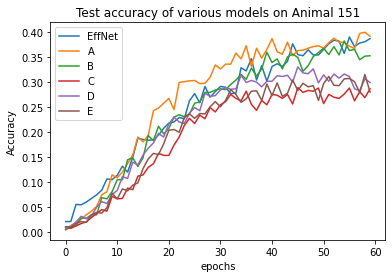

In [10]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

urlEff='https://raw.githubusercontent.com/zhongyang-hu/6289/main/midProject/EffNet.csv'
urlA ='https://raw.githubusercontent.com/zhongyang-hu/6289/main/midProject/trainNetA.csv'
urlB='https://raw.githubusercontent.com/zhongyang-hu/6289/main/midProject/trainNetB.csv'
urlC='https://raw.githubusercontent.com/zhongyang-hu/6289/main/midProject/trainNetC.csv'
urlD='https://raw.githubusercontent.com/zhongyang-hu/6289/main/midProject/trainNetD.csv'
urlE='https://raw.githubusercontent.com/zhongyang-hu/6289/main/midProject/trainNetE.csv'
dEff=pd.read_csv(urlEff)
dA=pd.read_csv(urlA)
dB=pd.read_csv(urlB)
dC=pd.read_csv(urlC)
dD=pd.read_csv(urlD)
dE=pd.read_csv(urlE)

x=[i for i in range(60)]
plt.clf()
plt.plot(x,dEff['test acc'],label='EffNet')
plt.plot(x,dA['accTest'],label='A')
plt.plot(x,dB['accTest'],label='B')
plt.plot(x,dC['accTest'],label='C')
plt.plot(x,dD['accTest'],label='D')
plt.plot(x,dE['accTest'],label='E')
plt.title('Test accuracy of various models on Animal 151')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()


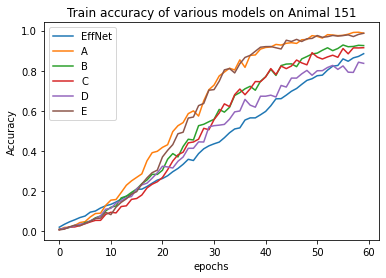

In [13]:
plt.clf()
plt.plot(x,dEff['train acc'],label='EffNet')
plt.plot(x,dA['accTrain'],label='A')
plt.plot(x,dB['accTrain'],label='B')
plt.plot(x,dC['accTrain'],label='C')
plt.plot(x,dD['accTrain'],label='D')
plt.plot(x,dE['accTrain'],label='E')
plt.title('Train accuracy of various models on Animal 151')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()


In [23]:
print()
print('the maximum accuracy of models are:(with training time)')

print(dA.loc[dA['accTest']==dA['accTest'].max()])
print(dB.loc[dB['accTest']==dB['accTest'].max()])
print(dC.loc[dC['accTest']==dC['accTest'].max()])
print(dD.loc[dD['accTest']==dD['accTest'].max()])
print(dE.loc[dE['accTest']==dE['accTest'].max()])
print('the reference model EfficientNet get', dEff['test acc'].max(),'accuracy with 3034 seconds')


the maximum accuracy of models are:(with training time)
    Unnamed: 0  accTrain   accTest        time
58          58  0.991627  0.400319  2030.60045
    Unnamed: 0  accTrain   accTest         time
54          54  0.910686  0.382775  1558.994152
    Unnamed: 0  accTrain   accTest         time
45          45  0.823565  0.289474  1250.689338
    Unnamed: 0  accTrain   accTest         time
45          45  0.763357  0.330941  1345.417451
    Unnamed: 0  accTrain   accTest         time
58          58  0.980861  0.315789  2249.044378
the reference model EfficientNet get 0.390749601275917 accuracy with 3034 seconds







All the models show the trend of overfitting after 30 epochs. Apply with scheduler, weight deacy and dropout in convolution cannot improve the result significantly. And the model A is the structure which earned the highest accuracy. It has only around 2 percent advantage compared with model B.
However, it costs 30% more time for training and extra 300MB for saving the model; the model B only requires 120MB storge.



Conclusion:
Training the conventional CNN for 
Conventional CNN advantage:
1. compare wtih the new generations, it is easy to implement. It's class only have two blocks. Can be adjusted for trainind data conveniently.
2. With limited number of layers and parameters per layer, it may be trained faster.


Conventional CNN Disadvantage: 
1. Amount of training parameter increases significantly with more layer.
The size of parameter can increase by times; and the performance increment may not be significant. It could occupy large storage.
2. Cannot update weights effectively. In very deep conventional CNN, this problem is severe and training these models requires more epochs. And the training time could be long.
